<a href="https://colab.research.google.com/github/clauderlima/data-science/blob/main/Teixeira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import plotly.express as px

In [2]:
dados1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dados/viaturas/abastecimento-pmdf-01-2021.csv')
dados2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dados/viaturas/abastecimento-pmdf-02-2021.csv')
dados3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dados/viaturas/abastecimento-pmdf-03-2021.csv')
dados4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dados/viaturas/abastecimento-pmdf-04-2021.csv')
dados5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dados/viaturas/abastecimento-pmdf-05-2021.csv')
dados6 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dados/viaturas/abastecimento-pmdf-06-2021.csv')
dados7 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dados/viaturas/abastecimento-pmdf-07-2021.csv')
dados8 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dados/viaturas/abastecimento-pmdf-08-2021.csv')
dados9 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dados/viaturas/abastecimento-pmdf-09-2021.csv')


In [3]:
dados = [dados1, dados2, dados3, dados4, dados5, dados6, dados7, dados8, dados9]

In [4]:
abastecimento_raw = pd.concat(dados)

In [5]:
abastecimento_raw.index = np.arange(len(abastecimento_raw))

In [6]:
abastecimento_raw.head(1)

,bairro,centroResultadoVeiculo,cidade,cnpj,consumo,cpfMotorista,data,distancia,endereco,estado,filialVeiculo,hodometro,id,limiteCredito,modelo,motorista,nomeFantasia,numeroCartao,numeroFrota,placa,produto,produtoId,quantidade,reaisPorKm,responsavel,saldoAtual,telefone,tipoFrota,tipoServico,unidade,valorTotal,valorUnitario
0,BRASILIA,BPMA,BRASÍLIA,37063328001309,0.03,916914194,01/01/2021 16:04:12,3,RUA SETOR SCE/SUL TRECHO 02 CONJUNTO 03 S/N PA...,DF,PMDF,1622,6841,0.0,BOTE,RODOLFO MEDEIROS DE PAULO PINHEIRO,REDE AUTO SHOPPING,60645800074179900,77109,BARCO109,GASOLINA COMUM,6,103.33,158.1,JEAN ARAUJO SANTANA DO VALE,0.0,6132483942,OSTENSIVO,COMBUSTIVEIS,Km/L,474.31,4.59


In [7]:
# Seleciona colunas relevantes
abastecimento = abastecimento_raw[['centroResultadoVeiculo', 'data', 'distancia',
        'hodometro', 'modelo', 'numeroFrota', 'placa' , 'quantidade', 'tipoFrota']]

In [8]:
abastecimento.columns

Index(['centroResultadoVeiculo', 'data', 'distancia', 'hodometro', 'modelo',
       'numeroFrota', 'placa', 'quantidade', 'tipoFrota'],
      dtype='object')

In [9]:
abastecimento.head(1)

,centroResultadoVeiculo,data,distancia,hodometro,modelo,numeroFrota,placa,quantidade,tipoFrota
0,BPMA,01/01/2021 16:04:12,3,1622,BOTE,77109,BARCO109,103.33,OSTENSIVO


In [10]:
# Dicionário para padronizar os nomes dos modelos de viaturas
dic_modelo = { 'BOTE' : 'EMBARCACAO', 'DOBLO' : 'FURGAO', 'GURGEL' : 'DIVERSOS', 'VOLVO' : 'DIVERSOS', 'RETROESCAVADEIRA' : 'TRATOR', 'PAJERO DAKAR' : 'PAJERO', 
    'FOCUS 2L FC FLEX' : 'FOCUS',     'VOLARE W9 ON' : 'ONIBUS', 'PAJERO DAKAR D' : 'PAJERO', 'JET SKI' : 'JET-SKI', 'TRITON' : 'CAMIONETA', 'LOGAN EXP 16' : 'LOGAN', 
    'CB 600 F' : 'MOTO',     'COROLLA XLI 1.8' : 'COROLLA', 'NEW HOLLAND' : 'TRATOR', 'PALIO WEEKEND TREKKING' : 'PALIO', 'COROLLA GLI FLEX' : 'COROLLA', 
    'SANDERO EXP 16' : 'SANDERO', 'M.BENZ413CDI SPRINTERF' : 'FURGAO', 'PRISMA MAXX' : 'PRISMA', 'ATEGO 1315' : 'CAMINHAO', 'LINEA ESSENCE 1.8' : 'LINEA', 'RD406' : 'TRATOR', 
    'HILUX' : 'CAMIONETA', 'TRANSIT 350L' : 'FURGAO', 'MASCA GRANVIA E O' : 'ONIBUS', 'L200 TRITON 3.2 D' : 'CAMIONETA', 'MASCA GRANMIDI' : 'ONIBUS', 'PALIO ESSENCE 1.6' : 'PALIO', 
    'TRAILBLAZER LTZ' : 'BLAZER', 'TRAILBLAZER' : 'BLAZER', 'EUROBUS ESPECIALMC.ON' : 'ONIBUS', 'LANDER XTZ 250' : 'MOTO', 'TECTOR 240E30S 6X2' : 'CAMINHAO', 
    'COROLLA XEI 2.0' : 'COROLLA', 'HILUX CD SR' : 'HILUX', 'REVESCAP' : 'ONIBUS', 'HORNET' : 'MOTO', 'ASX 2.0' : 'ASX', 'TECTOR' : 'CAMINHAO', 'S10' : 'CAMIONETA',
    'XRE 300' : 'MOTO', 'MASCA GRANMIDE E D O' : 'ONIBUS', 'MASCA GRANMIDI O' : 'ONIBUS', 'JOURNEY.' : 'JOURNEY', 'TRIUMPH TIGER 800 XR' : 'MOTO', 'TIGER 800 XCx' : 'MOTO', 
    'SPRINTER AMBULANCIA' : 'FURGAO', 'EMPILHADEIRA' : 'TRATOR', 'FIAT DUCATO' : 'FURGAO', 'DUCATO' : 'FURGAO', 'XT 660 R' : 'MOTO', 'DAILY 70C16CS' : 'CAMINHAO', 
    'SIENA HLX' : 'DIVERSOS', 'DOBLO HLX 1.8' : 'FURGAO', '19320' : 'CAMINHAO', 'MARCOPOLO PARADISO' : 'ONIBUS', 'COMIL' : 'ONIBUS', 'VOLARE W8 ON' : 'ONIBUS', 
    'STRALIS 460S36T' : 'CAMINHAO', 'TRITON SPORT GLS' : 'CAMIONETA', 'OUTROS MOD VEIC' : 'DIVERSOS', '310 D SPRINTER' : 'FURGAO', 'CARGO 816 S' : 'CAMINHAO',
    'GURGEL X-12' : 'DIVERSOS', 'MASTER FUR L1H1' : 'FURGAO', 'DOBLO CARGO FLEX' : 'FURGAO', 'VOLVO 190' : 'DIVERSOS', 'BARCO' : 'EMBARCACAO', 'BOXER M330M HDI' : 'FURGAO', 
    'NC 700X' : 'MOTO', 'TRIUMPH' : 'MOTO', 'TRIUMPH TIGER 800 XCX' : 'MOTO', 'MASTER MAR TPRE1' : 'FURGAO', 'NEOBUS' : 'ONIBUS', 'FRONTIER XE 4x4 2.8' : 'CAMIONETA', 
    'FRONTIER' : 'CAMIONETA', 'BLAZER ADVANTAGE' : 'BLAZER', 'YANMAR 12' : 'TRATOR', 'T4 TDI 3.0' : 'DIVERSOS', 'H.DAVIDSON FLHP' : 'MOTO', 'EQUIPAMENTOS' : 'DIVERSOS', 
    'MASTER' : 'FURGAO', 'VOL REVESC.MO' : 'ONIBUS', 'LOGAN EXP. 1.6' : 'LOGAN', 'FORD KA 1.5' : 'KA', 'GERADOR DIESEL' : 'DIVERSOS', '15190':'CAMINHAO', 'RANGER' : 'CAMIONETA',
    'VERANEIO' : 'DIVERSOS', }

In [11]:
# Dicionário para padronizar o nome das unidades
dic_unidade = { 'GERADOR (DITEL)' : 'DITEL', 'LEILAO' : 'DPTS', 'CMT' : 'GCG', 'SAV' : 'DPTS', 'DPMT' : 'DPTS', 'CURSOS' : 'CTESP' }

In [12]:
# Cria a coluna mês
abastecimento['mes'] = abastecimento.loc[:,'data'].str.slice(3,5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
# Aplica os dicionários no DataFrame
abastecimento.loc[:,('modelo')].replace(dic_modelo, inplace=True)
abastecimento.loc[:,('centroResultadoVeiculo')].replace(dic_unidade, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
abastecimento.modelo.unique()

array(['EMBARCACAO', 'GERADOR', 'TRATOR', 'PAJERO', 'FURGAO', 'FOCUS',
       'ONIBUS', 'JET-SKI', 'LOGAN', 'MOTO', 'COROLLA', 'PALIO',
       'CAMIONETA', 'SANDERO', 'PRISMA', 'MARRUA', 'CAMINHAO', 'LINEA',
       'KWID', 'BLAZER', 'ETIOS', 'HILUX', 'ASX', 'JOURNEY', 'RENEGADE',
       'DIVERSOS', 'KA'], dtype=object)

In [28]:
selecao_modelo = ['PAJERO', 'COROLLA', 'LINEA', 'BLAZER', 'HILUX', 'ASX', 'JOURNEY']

In [29]:
viaturas_ostensivas = abastecimento[abastecimento.modelo.isin(selecao_modelo)]

In [30]:
viaturas_ostensivas.head(2)

,centroResultadoVeiculo,data,distancia,hodometro,modelo,numeroFrota,placa,quantidade,tipoFrota,mes
24,8 BPM,01/01/2021 00:27:36,523,187984,PAJERO,552611,JDX-0027,44.48,OSTENSIVO,01
25,8 BPM,01/01/2021 18:23:34,162,188146,PAJERO,552611,JDX-0027,30.16,OSTENSIVO,01


In [31]:
viaturas_ostensivas.tipoFrota.unique()

array(['OSTENSIVO', 'ADMINISTRATIVO', 'ENSINO E INSTRUCAO', 'VELADO'],
      dtype=object)

In [ ]:
viaturas_ostensivas.query('tipoFrota == "ADMINISTRATIVO"')

In [33]:
viaturas_ostensivas.centroResultadoVeiculo.unique()

array(['8 BPM', 'RPMON', '19 BPM', '12 BPM', '15 BPM', 'APMB', '10 BPM',
       '1 CPR', 'DPTS', '1 BPR', '14 BPM', '6 CPR', 'CME', '9 BPM',
       'BPESC', '11 BPM', '24 BPM', '16 BPM', '20 BPM', '2 BPR', '2 BPM',
       '28 BPM', '7 BPM', '4 BPM', '26 BPM', '25 BPM', '27 BPM', '6 BPM',
       'BPTRAN', 'ROTAM', 'BOPE', 'GCG', 'CI', 'CPP', '2 CPR', 'BPCHOQUE',
       '21 BPM', 'CMBEL', '13 BPM', '17 BPM', 'CTESP', 'CAEAP', 'DEEC',
       'BPRV', '3 CPR', '4 CPR', '5 BPM', '3 BPM', 'BAVOP', 'BPMA', 'DCC',
       'DOP', '5 CPR', 'COPOM', 'BPCAES', '1 BPM', 'CMAN', 'DLF', 'CCS',
       'EM', 'DSAP', 'DITEL'], dtype=object)

In [34]:
selecao_unidade = ['8 BPM', '15 BPM', '10 BPM', '14 BPM', '9 BPM', '11 BPM', '24 BPM', '16 BPM', '20 BPM', '2 BPM',
       '28 BPM', '7 BPM', '4 BPM', '26 BPM', '25 BPM', '27 BPM', '6 BPM', '21 BPM', '13 BPM', '17 BPM', '5 BPM', '3 BPM',
       '1 BPM']

In [37]:
viaturas_unidades_area = viaturas_ostensivas[viaturas_ostensivas.centroResultadoVeiculo.isin(selecao_unidade)]

In [38]:
# Todos
abastecimento.shape

(71474, 10)

In [39]:
# Somente viaturas ostensivas
viaturas_ostensivas.shape

(48711, 10)

In [40]:
# Somente unidades de área
viaturas_unidades_area.shape

(33953, 10)

In [41]:
viaturas = viaturas_unidades_area

In [43]:
viaturas.head(1)

,centroResultadoVeiculo,data,distancia,hodometro,modelo,numeroFrota,placa,quantidade,tipoFrota,mes
24,8 BPM,01/01/2021 00:27:36,523,187984,PAJERO,552611,JDX-0027,44.48,OSTENSIVO,01


In [46]:
viaturas.columns = ['unidade', 'data', 'distancia', 'odometro', 'modelo', 'prefixo', 'placa', 'quantidade', 'tipo', 'mes']

In [47]:
viaturas


,unidade,data,distancia,odometro,modelo,prefixo,placa,quantidade,tipo,mes
24,8 BPM,01/01/2021 00:27:36,523,187984,PAJERO,552611,JDX-0027,44.48,OSTENSIVO,01
25,8 BPM,01/01/2021 18:23:34,162,188146,PAJERO,552611,JDX-0027,30.16,OSTENSIVO,01
26,8 BPM,03/01/2021 09:49:58,410,188556,PAJERO,552611,JDX-0027,48.54,OSTENSIVO,01
27,8 BPM,05/01/2021 20:26:21,482,189038,PAJERO,552611,JDX-0027,53.99,OSTENSIVO,01
28,8 BPM,31/01/2021 09:33:25,346,189384,PAJERO,552611,JDX-0027,46.50,OSTENSIVO,01
...,...,...,...,...,...,...,...,...,...,...
70781,24 BPM,25/09/2021 21:40:09,213,39284,JOURNEY,554238,PBY-6836,44.46,OSTENSIVO,09
70782,24 BPM,26/09/2021 20:46:56,203,39487,JOURNEY,554238,PBY-6836,47.30,OSTENSIVO,09
70783,24 BPM,27/09/2021 21:54:39,229,39716,JOURNEY,554238,PBY-6836,51.63,OSTENSIVO,09
70784,24 BPM,29/09/2021 00:44:50,243,39959,JOURNEY,554238,PBY-6836,47.89,OSTENSIVO,09


In [49]:
grupo_viaturas_unidade = viaturas.groupby('unidade')

In [ ]:
dt = []
for upm in unidades:
  print(upm)
  for x in ["01","02","03","04","05","06","07","08","09"]:
    query = "mes == '" + x + "'"
    qtd = len(grupo_viaturas_unidade.get_group(upm).query(query).placa.unique())
    print("Mês {} viaturas abastecidas {}".format(x, qtd))
    dt.append([upm, x, qtd])

In [ ]:
grupo_viaturas_unidade.get_group('1 BPM').query("mes == '01'")

In [130]:
vtr_unidade = pd.DataFrame(dt)

In [131]:
vtr_unidade.head(2)

,0,1,2
0,8 BPM,01,22
1,8 BPM,02,23


In [132]:
vtr_unidade.columns = ['unidade', 'mes', 'qtd_vtr']

In [133]:
vtr_unidade

,unidade,mes,qtd_vtr
0,8 BPM,01,22
1,8 BPM,02,23
2,8 BPM,03,21
3,8 BPM,04,23
4,8 BPM,05,23
...,...,...,...
202,1 BPM,05,22
203,1 BPM,06,21
204,1 BPM,07,22
205,1 BPM,08,23


In [136]:
ocorrencias = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dados/genesis.xlsx')

In [139]:
ocorrencias.columns

Index(['UPM', 'JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET',
       'OUT', 'NOV', 'DEZ', 'TOTAL', 'Unnamed: 14'],
      dtype='object')

In [140]:
ocorrencias.head(1)

,UPM,JAN,FEV,MAR,ABR,MAI,JUN,JUL,AGO,SET,OUT,NOV,DEZ,TOTAL,Unnamed: 14
0,1º,14º BPM,944,981,982,985,986,926,1010,1093,1072,1181,530,0,10690


In [161]:
ocorrencias.columns = ['ordem', 'UPM', '01', '02', '03', '04', '05', '06', '07', '08', '09',
       '10', '11', '12', 'TOTAL']

In [142]:
ocorrencias.head(2)

,ordem,UPM,JAN,FEV,MAR,ABR,MAI,JUN,JUL,AGO,SET,OUT,NOV,DEZ,TOTAL
0,1º,14º BPM,944,981,982,985,986,926,1010,1093,1072,1181,530,0,10690
1,2º,26º BPM,885,831,943,887,887,906,914,907,887,943,507,0,9497


In [143]:
viaturas['unidade'].unique()

array(['8 BPM', '15 BPM', '10 BPM', '14 BPM', '9 BPM', '11 BPM', '24 BPM',
       '16 BPM', '20 BPM', '2 BPM', '28 BPM', '7 BPM', '4 BPM', '26 BPM',
       '25 BPM', '27 BPM', '6 BPM', '21 BPM', '13 BPM', '17 BPM', '5 BPM',
       '3 BPM', '1 BPM'], dtype=object)

In [146]:
ocorrencias['UPM'] = ocorrencias.UPM.apply(lambda x:  x.replace('º', ''))

In [149]:
ocorrencias = ocorrencias[ocorrencias.UPM.isin(viaturas['unidade'].unique())]

In [150]:
ocorrencias

,ordem,UPM,JAN,FEV,MAR,ABR,MAI,JUN,JUL,AGO,SET,OUT,NOV,DEZ,TOTAL
0,1º,14 BPM,944,981,982,985,986,926,1010,1093,1072,1181,530,0,10690
1,2º,26 BPM,885,831,943,887,887,906,914,907,887,943,507,0,9497
2,3º,2 BPM,926,709,660,676,852,840,918,1634,771,859,456,0,9301
3,4º,9 BPM,830,765,874,839,896,907,778,819,843,893,432,0,8876
4,5º,27 BPM,767,709,725,752,772,790,765,799,837,978,422,0,8316
5,6º,21 BPM,674,724,717,777,875,824,763,702,711,808,475,0,8050
6,7º,8 BPM,812,740,688,759,719,638,767,691,656,884,411,0,7765
7,8º,13 BPM,755,741,732,753,773,743,699,580,604,737,279,0,7396
8,9º,10 BPM,730,676,695,688,678,625,652,618,713,780,275,0,7130
9,10º,20 BPM,563,610,527,579,720,631,673,632,662,693,341,0,6631


In [152]:
vtr_unidade['mes-unidade'] = vtr_unidade.mes + vtr_unidade.unidade

In [ ]:
vtr_unidade['mes-unidade'].apply(lambda x : print(x))

In [157]:
vtr_unidade.head(2)

,unidade,mes,qtd_vtr,mes-unidade
0,8 BPM,01,22,018 BPM
1,8 BPM,02,23,028 BPM


In [185]:
def buscaOcorrencia(dado):
  mes = dado[0:2]
  unidade = dado[2:]
  return ocorrencias.query('UPM == "' + unidade + '"')[mes].iloc[0]


In [186]:
buscaOcorrencia('028 BPM')

740

In [187]:
ocorrencias

,ordem,UPM,01,02,03,04,05,06,07,08,09,10,11,12,TOTAL
0,1º,14 BPM,944,981,982,985,986,926,1010,1093,1072,1181,530,0,10690
1,2º,26 BPM,885,831,943,887,887,906,914,907,887,943,507,0,9497
2,3º,2 BPM,926,709,660,676,852,840,918,1634,771,859,456,0,9301
3,4º,9 BPM,830,765,874,839,896,907,778,819,843,893,432,0,8876
4,5º,27 BPM,767,709,725,752,772,790,765,799,837,978,422,0,8316
5,6º,21 BPM,674,724,717,777,875,824,763,702,711,808,475,0,8050
6,7º,8 BPM,812,740,688,759,719,638,767,691,656,884,411,0,7765
7,8º,13 BPM,755,741,732,753,773,743,699,580,604,737,279,0,7396
8,9º,10 BPM,730,676,695,688,678,625,652,618,713,780,275,0,7130
9,10º,20 BPM,563,610,527,579,720,631,673,632,662,693,341,0,6631


In [167]:
mes = '02'
unidade = '8 BPM'

In [184]:
ocorrencias.query('UPM == "' + unidade + '"')[mes].iloc[0]

740

In [189]:
vtr_unidade['ocorrencias'] = vtr_unidade['mes-unidade'].apply(lambda x: buscaOcorrencia(x))

In [190]:
vtr_unidade

,unidade,mes,qtd_vtr,mes-unidade,ocorrencias
0,8 BPM,01,22,018 BPM,812
1,8 BPM,02,23,028 BPM,740
2,8 BPM,03,21,038 BPM,688
3,8 BPM,04,23,048 BPM,759
4,8 BPM,05,23,058 BPM,719
...,...,...,...,...,...
202,1 BPM,05,22,051 BPM,422
203,1 BPM,06,21,061 BPM,349
204,1 BPM,07,22,071 BPM,482
205,1 BPM,08,23,081 BPM,507


In [195]:
grupo_mes = vtr_unidade.groupby('mes')
grupo_unidade = vtr_unidade.groupby('unidade')

In [196]:
grupo_unidade.get_group('8 BPM')

,unidade,mes,qtd_vtr,mes-unidade,ocorrencias
0,8 BPM,01,22,018 BPM,812
1,8 BPM,02,23,028 BPM,740
2,8 BPM,03,21,038 BPM,688
3,8 BPM,04,23,048 BPM,759
4,8 BPM,05,23,058 BPM,719
5,8 BPM,06,23,068 BPM,638
6,8 BPM,07,24,078 BPM,767
7,8 BPM,08,25,088 BPM,691
8,8 BPM,09,24,098 BPM,656


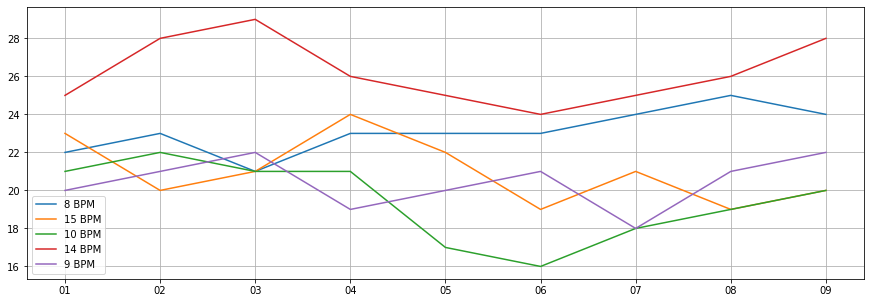

In [212]:
plt.figure(figsize=(15,5))
ax = plt.subplot()

for upm in unidades[:5]:
  # labelMes = grupo_unidade.get_group(upm)['mes']
  # labelOcorrencia = grupo_unidade.get_group(upm)['ocorrencias']
  # ax.plot(labelMes, labelOcorrencia, label=upm)

  labelMes = grupo_unidade.get_group(upm)['mes']
  labelViatura = grupo_unidade.get_group(upm)['qtd_vtr']
  ax.plot(labelMes, labelViatura, label=upm)

ax.grid()
ax.legend()
ax = ax

# Exemplo ML


In [215]:
vtr_unidade[['unidade', 'mes', 'qtd_vtr']]

,unidade,mes,qtd_vtr
0,8 BPM,01,22
1,8 BPM,02,23
2,8 BPM,03,21
3,8 BPM,04,23
4,8 BPM,05,23
...,...,...,...
202,1 BPM,05,22
203,1 BPM,06,21
204,1 BPM,07,22
205,1 BPM,08,23


In [216]:
X = vtr_unidade[['unidade', 'mes', 'qtd_vtr']]
y = vtr_unidade['ocorrencias']

In [220]:
pd.get_dummies(X['unidade'])

,1 BPM,10 BPM,11 BPM,13 BPM,14 BPM,15 BPM,16 BPM,17 BPM,2 BPM,20 BPM,21 BPM,24 BPM,25 BPM,26 BPM,27 BPM,28 BPM,3 BPM,4 BPM,5 BPM,6 BPM,7 BPM,8 BPM,9 BPM
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
203,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
204,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
205,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [224]:
X = pd.concat([vtr_unidade, pd.get_dummies(vtr_unidade['unidade'])], axis = 1)

In [230]:
X = X.drop(['unidade','mes-unidade', 'ocorrencias'] , axis=1)

In [231]:
X.head(2)

,mes,qtd_vtr,1 BPM,10 BPM,11 BPM,13 BPM,14 BPM,15 BPM,16 BPM,17 BPM,2 BPM,20 BPM,21 BPM,24 BPM,25 BPM,26 BPM,27 BPM,28 BPM,3 BPM,4 BPM,5 BPM,6 BPM,7 BPM,8 BPM,9 BPM
0,01,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,02,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [232]:
X

,mes,qtd_vtr,1 BPM,10 BPM,11 BPM,13 BPM,14 BPM,15 BPM,16 BPM,17 BPM,2 BPM,20 BPM,21 BPM,24 BPM,25 BPM,26 BPM,27 BPM,28 BPM,3 BPM,4 BPM,5 BPM,6 BPM,7 BPM,8 BPM,9 BPM
0,01,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,02,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,03,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,04,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,05,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,05,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
203,06,21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
204,07,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
205,08,23,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [233]:
y

0      812
1      740
2      688
3      759
4      719
      ... 
202    422
203    349
204    482
205    507
206    482
Name: ocorrencias, Length: 207, dtype: int64

In [234]:
from sklearn.model_selection import train_test_split

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=.8)

In [247]:
X_train.shape

(165, 25)

In [248]:
y_train.shape

(165,)

In [249]:
X_test.shape

(42, 25)

In [250]:
y_test.shape

(42,)

In [321]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

### Random Forest

In [322]:
modeloRF = RandomForestClassifier(random_state=1,  n_estimators=250)

In [323]:
modeloRF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250, random_state=1)

In [324]:
previsaoRF = modeloRF.predict(X_test)

In [325]:
mean_absolute_error(y_test, previsaoRF)

54.26190476190476

### Linear Regression

In [311]:
from sklearn.linear_model import LinearRegression

In [312]:
modeloLR = LinearRegression()

In [316]:
modeloLR.fit(X_train, y_train)

LinearRegression()

In [314]:
previsaoLF = modeloLR.predict(X_test)

In [315]:
mean_absolute_error(y_test, previsaoLF)

51.47880041387886

In [260]:
from sklearn.metrics import mean_absolute_error

In [265]:
from sklearn.metrics import confusion_matrix

In [319]:
X.columns

Index(['mes', 'qtd_vtr', '1 BPM', '10 BPM', '11 BPM', '13 BPM', '14 BPM',
       '15 BPM', '16 BPM', '17 BPM', '2 BPM', '20 BPM', '21 BPM', '24 BPM',
       '25 BPM', '26 BPM', '27 BPM', '28 BPM', '3 BPM', '4 BPM', '5 BPM',
       '6 BPM', '7 BPM', '8 BPM', '9 BPM'],
      dtype='object')

In [326]:
confusion_matrix(y_test, previsaoRF)

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [327]:
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



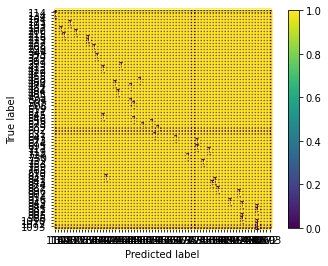

In [329]:
plot_confusion_matrix(modeloRF, X_test, y_test)